#import some usefull library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the data after uploading the csv file

In [ ]:
df = pd.read_csv("/content/qura_question_pair.csv")
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.shape

(404290, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
#For checking the number of duplicate row in the data set
df.duplicated().sum()

0

#Here we check the number of duplicate and non duplicate  question pairs  [1<-duplicate, 0<-non duplicate ]

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

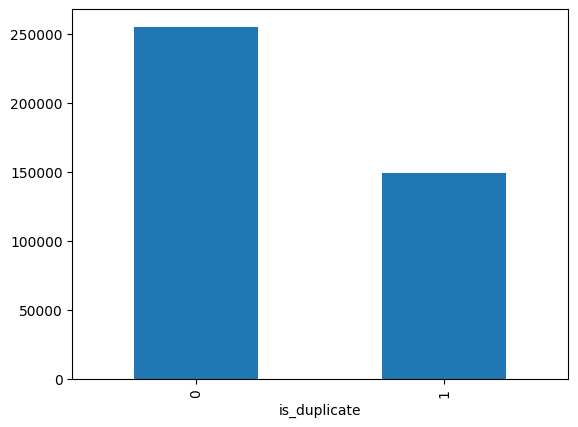

In [ ]:
print(df['is_duplicate'].value_counts())
print(df['is_duplicate'].value_counts()/df['is_duplicate'].count()*100)
df['is_duplicate'].value_counts().plot(kind = 'bar')

In [ ]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Total question is (number of question1 + number of question 2) = ',qid.shape[0])
print("Number of unique questions",np.unique(qid).shape[0])

x = qid.value_counts()>1
print("Number of repeated questions   ",x[x].shape[0])

Total question is (number of question1 + number of question 2) =  808580
Number of unique questions 537933
Number of repeated questions    111780


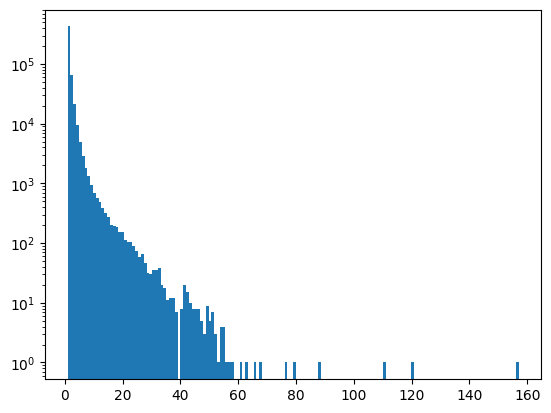

In [ ]:
#repeatation count vs number of word in this particular repetation(that is (x,y) means y number of word repetated x number of times )
plt.hist(qid.value_counts().values, bins = 160)
plt.yscale('log')
plt.show()

#Data Frame partition
we devied the data frame into two part according to the duplicate question pairs and non duplicate question pairs.After that we take 20000 data from duplicate data frame and 20000 data from non duplicate data frame .Next step we concat them and suffle all data according to the row.

In [ ]:
df_0 = df[df['is_duplicate'] == 0]
df_1 = df[df['is_duplicate'] == 1]
print("Shape of non duplicate data frame ",df_0.shape )
print("Shape of duplicate data frame ",df_1.shape )

Shape of non duplicate data frame  (255027, 6)
Shape of duplicate data frame  (149263, 6)


In [ ]:
df_0 = df_0.sample(20000)
df_1 = df_1.sample(20000)

new_df = pd.concat([df_0, df_1], axis=0)
# Shuffle the DataFrame
new_df = new_df.sample(frac=1).reset_index(drop=True)

new_df.shape

(40000, 6)

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,399083,129246,34231,What's the best way to start eating healthy?,What does a healthy diet consist of?,0
1,314508,257850,84158,What is the best book to learn c#?,Which is the best book to learn programming in...,1
2,30940,57075,57076,What is it like traveling by bus from Cedar Ra...,Can anyone know about Indian Kali weapon?,0
3,341365,469175,469176,How can communism and democracy go hand in hand?,Is communism a political system in the lines o...,0
4,381481,204944,513221,If a hole is made right through Earth so it re...,If a hole is made on earth to reach the other ...,1


In [ ]:
new_df.duplicated().sum()

0

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            40000 non-null  int64 
 1   qid1          40000 non-null  int64 
 2   qid2          40000 non-null  int64 
 3   question1     40000 non-null  object
 4   question2     40000 non-null  object
 5   is_duplicate  40000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.8+ MB


In [ ]:
#We take only two question pairs
q_df = new_df[['question1','question2']]
q_df.shape

(40000, 2)

In [ ]:
q_df.head()

,question1,question2
0,What's the best way to start eating healthy?,What does a healthy diet consist of?
1,What is the best book to learn c#?,Which is the best book to learn programming in...
2,What is it like traveling by bus from Cedar Ra...,Can anyone know about Indian Kali weapon?
3,How can communism and democracy go hand in hand?,Is communism a political system in the lines o...
4,If a hole is made right through Earth so it re...,If a hole is made on earth to reach the other ...


#Apply CountVectorizer on question pairs

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#merge questions

questions =  list(q_df['question1']) + list(q_df['question2'])
print("Length of questions    ",len(questions))

cv = CountVectorizer(max_features= 500)
q1, q2 = np.vsplit(cv.fit_transform(questions).toarray(),2)


Length of questions     80000


In [ ]:
print("After countvectorizer the shape of the question_1 column become  ",q1.shape)
print("After countvectorizer the shape of the question_2 column become  ",q2.shape)

After countvectorizer the shape of the question_1 column become   (40000, 500)
After countvectorizer the shape of the question_2 column become   (40000, 500)


In [ ]:
temp1_df = pd.DataFrame(q1, index=q_df.index)
temp2_df = pd.DataFrame(q2, index=q_df.index)

temp_df = pd.concat([temp1_df,temp2_df], axis = 1)
temp_df.shape

(40000, 1000)

In [ ]:
temp_df['is_duplicate'] = new_df['is_duplicate']
temp_df.shape

(40000, 1001)

In [ ]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,is_duplicate
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:,0:-1].values,
                                                    temp_df.iloc[:,-1].values,
                                                    test_size= 0.2,
                                                    random_state=42)

In [ ]:
print("shape of X_train   ",X_train.shape)
print("shape of y_train   ",y_train.shape)
print("shape of X_test   ",X_test.shape)
print("shape of y_test   ",y_test.shape)

shape of X_train    (32000, 1000)
shape of y_train    (32000,)
shape of X_test    (8000, 1000)
shape of y_test    (8000,)


#Apply RandomForestClassifier and XGBClassifier after apply only countvectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7225

In [ ]:
from xgboost import XGBClassifier
xgb  = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_1 = rf.predict(X_test)
accuracy_score(y_test,y_pred_1)

0.7225

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,399083,129246,34231,What's the best way to start eating healthy?,What does a healthy diet consist of?,0
1,314508,257850,84158,What is the best book to learn c#?,Which is the best book to learn programming in...,1
2,30940,57075,57076,What is it like traveling by bus from Cedar Ra...,Can anyone know about Indian Kali weapon?,0
3,341365,469175,469176,How can communism and democracy go hand in hand?,Is communism a political system in the lines o...,0
4,381481,204944,513221,If a hole is made right through Earth so it re...,If a hole is made on earth to reach the other ...,1


#Feature Extracting
1. **q1_length** = numbers of character in question_1
2. **q2_length** = numbers of character in question_2
3. **q1_num_word** = numbers of word in question_1
4. **q2_num_word** = numbers of word in question_2
5. **common_words**	= numbers of common words between q1 and q2
6. **total_length**	= (q1_num_word +q2_num_word )
7. **word_share** = common_words / total_length

In [ ]:
new_df['q1_length'] = new_df['question1'].str.len()
new_df['q2_length'] = new_df['question2'].str.len()
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length
0,399083,129246,34231,What's the best way to start eating healthy?,What does a healthy diet consist of?,0,44,36
1,314508,257850,84158,What is the best book to learn c#?,Which is the best book to learn programming in...,1,34,63
2,30940,57075,57076,What is it like traveling by bus from Cedar Ra...,Can anyone know about Indian Kali weapon?,0,62,41
3,341365,469175,469176,How can communism and democracy go hand in hand?,Is communism a political system in the lines o...,0,48,107
4,381481,204944,513221,If a hole is made right through Earth so it re...,If a hole is made on earth to reach the other ...,1,108,90


In [ ]:
new_df['q1_num_word'] = new_df['question1'].apply(lambda row : len(row.split(' ')))
new_df['q2_num_word'] = new_df['question2'].apply(lambda row : len(row.split(' ')))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_word,q2_num_word
0,399083,129246,34231,What's the best way to start eating healthy?,What does a healthy diet consist of?,0,44,36,8,7
1,314508,257850,84158,What is the best book to learn c#?,Which is the best book to learn programming in...,1,34,63,8,12
2,30940,57075,57076,What is it like traveling by bus from Cedar Ra...,Can anyone know about Indian Kali weapon?,0,62,41,12,7
3,341365,469175,469176,How can communism and democracy go hand in hand?,Is communism a political system in the lines o...,0,48,107,9,19
4,381481,204944,513221,If a hole is made right through Earth so it re...,If a hole is made on earth to reach the other ...,1,108,90,22,18


In [ ]:
def common_word(row) :
 w1= set(map(lambda word : word.lower().strip(), row['question1'].split(' ')))
 w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(' ')))
 common_w = len(w1 & w2)
 return common_w

In [ ]:
new_df['common_words'] = new_df.apply(common_word, axis = 1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_word,q2_num_word,common_words
0,399083,129246,34231,What's the best way to start eating healthy?,What does a healthy diet consist of?,0,44,36,8,7,0
1,314508,257850,84158,What is the best book to learn c#?,Which is the best book to learn programming in...,1,34,63,8,12,6
2,30940,57075,57076,What is it like traveling by bus from Cedar Ra...,Can anyone know about Indian Kali weapon?,0,62,41,12,7,0
3,341365,469175,469176,How can communism and democracy go hand in hand?,Is communism a political system in the lines o...,0,48,107,9,19,3
4,381481,204944,513221,If a hole is made right through Earth so it re...,If a hole is made on earth to reach the other ...,1,108,90,22,18,10


In [ ]:
def total_length(row) :
 w1= set(map(lambda word : word.lower().strip(), row['question1'].split(' ')))
 w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(' ')))
 return (len(w1) +len(w2))

In [ ]:
new_df['total_length'] = new_df.apply(total_length, axis = 1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_word,q2_num_word,common_words,total_length
0,399083,129246,34231,What's the best way to start eating healthy?,What does a healthy diet consist of?,0,44,36,8,7,0,15
1,314508,257850,84158,What is the best book to learn c#?,Which is the best book to learn programming in...,1,34,63,8,12,6,20
2,30940,57075,57076,What is it like traveling by bus from Cedar Ra...,Can anyone know about Indian Kali weapon?,0,62,41,12,7,0,19
3,341365,469175,469176,How can communism and democracy go hand in hand?,Is communism a political system in the lines o...,0,48,107,9,19,3,23
4,381481,204944,513221,If a hole is made right through Earth so it re...,If a hole is made on earth to reach the other ...,1,108,90,22,18,10,39


In [ ]:
new_df['word_share'] = round(new_df['common_words']/new_df['total_length'],3)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_word,q2_num_word,common_words,total_length,word_share
0,399083,129246,34231,What's the best way to start eating healthy?,What does a healthy diet consist of?,0,44,36,8,7,0,15,0.000
1,314508,257850,84158,What is the best book to learn c#?,Which is the best book to learn programming in...,1,34,63,8,12,6,20,0.300
2,30940,57075,57076,What is it like traveling by bus from Cedar Ra...,Can anyone know about Indian Kali weapon?,0,62,41,12,7,0,19,0.000
3,341365,469175,469176,How can communism and democracy go hand in hand?,Is communism a political system in the lines o...,0,48,107,9,19,3,23,0.130
4,381481,204944,513221,If a hole is made right through Earth so it re...,If a hole is made on earth to reach the other ...,1,108,90,22,18,10,39,0.256


In [ ]:
print("number minimum character in  question1   ", new_df['q1_length'].min())
print("number maximum character in  question1   ", new_df['q1_length'].max())
print("number average character in  question1   ", new_df['q1_length'].mean())

number minimum character in  question1    2
number maximum character in  question1    334
number average character in  question1    58.357


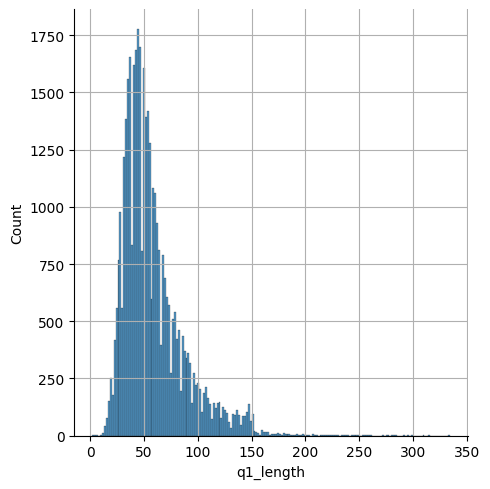

In [ ]:
sns.displot(new_df['q1_length'])
plt.grid()
plt.show()

number minimum character in  question2    5
number maximum character in  question2    1151
number average character in  question2    58.836875


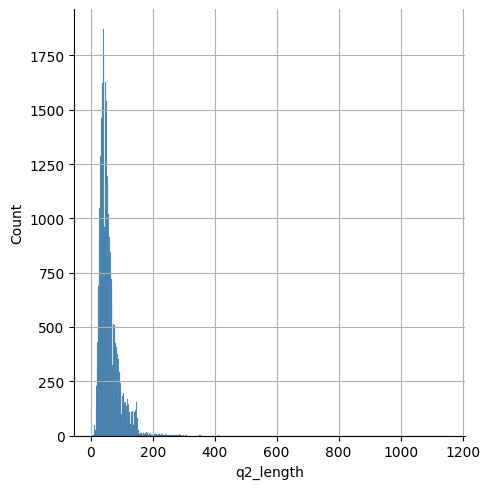

In [ ]:
print("number minimum character in  question2   ", new_df['q2_length'].min())
print("number maximum character in  question2   ", new_df['q2_length'].max())
print("number average character in  question2   ", new_df['q2_length'].mean())

sns.displot(new_df['q2_length'])
plt.grid()
plt.show()

number minimum word in  question1    1
number maximum word in  question1    68
number average word in  question1    10.746375


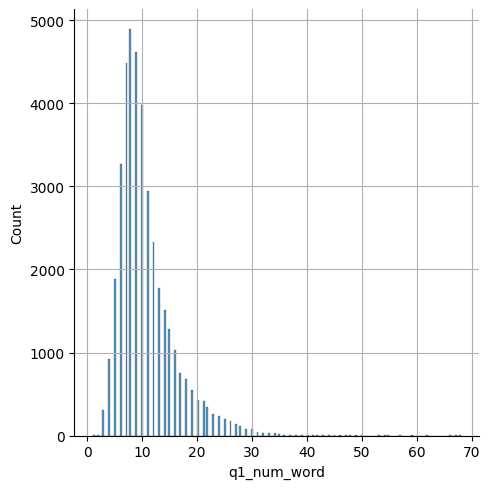

In [ ]:
print("number minimum word in  question1   ", new_df['q1_num_word'].min())
print("number maximum word in  question1   ", new_df['q1_num_word'].max())
print("number average word in  question1   ", new_df['q1_num_word'].mean())

sns.displot(new_df['q1_num_word'])
plt.grid()
plt.show()

<ipython-input-44-82dde4de26ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['common_words'],label = 'non_duplicate')
<ipython-input-44-82dde4de26ea>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['common_words'],label

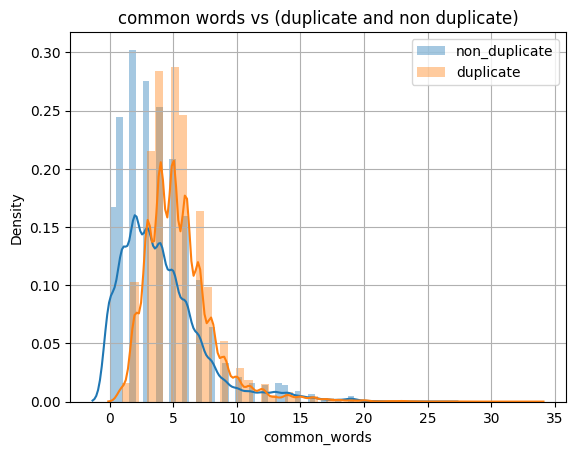

In [ ]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['common_words'],label = 'non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['common_words'],label = 'duplicate')
plt.legend()
plt.grid()
plt.title('common words vs (duplicate and non duplicate)')
plt.show()

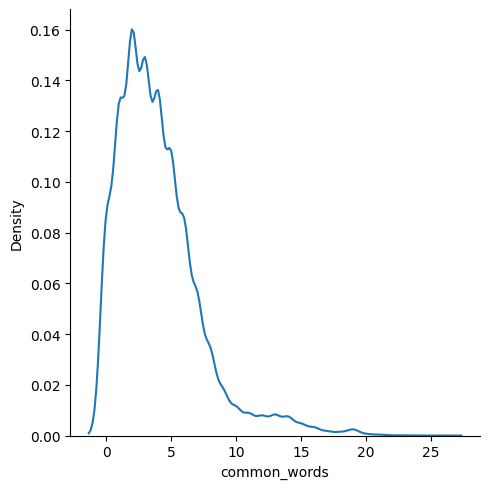

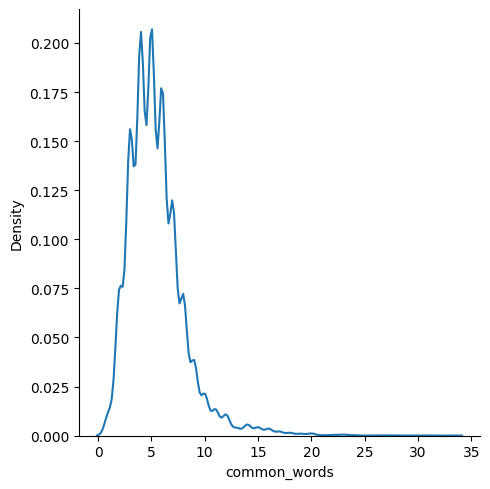

In [ ]:
# Plotting using sns.displot
sns.displot(new_df[new_df['is_duplicate'] == 0]['common_words'],label = 'non_duplicate', kind= 'kde')
sns.displot(new_df[new_df['is_duplicate'] == 1]['common_words'],label = 'duplicate', kind= 'kde')
plt.show()

<ipython-input-46-303cba507c79>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['total_length'],label = 'non_duplicate')
<ipython-input-46-303cba507c79>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['total_length'],label

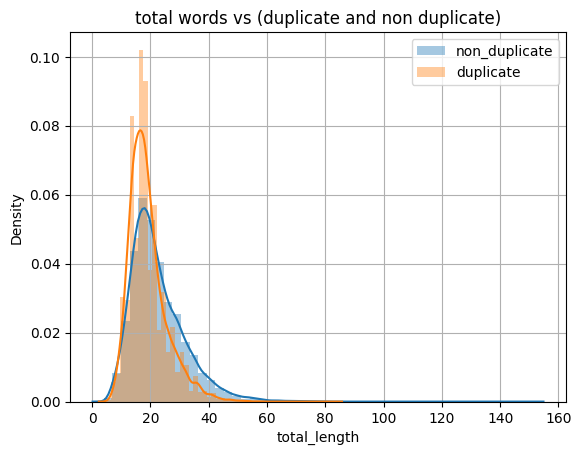

In [ ]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['total_length'],label = 'non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['total_length'],label = 'duplicate')
plt.legend()
plt.grid()
plt.title('total words vs (duplicate and non duplicate)')
plt.show()

<ipython-input-47-7d52c2f94430>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label = 'non_duplicate')
<ipython-input-47-7d52c2f94430>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label = '

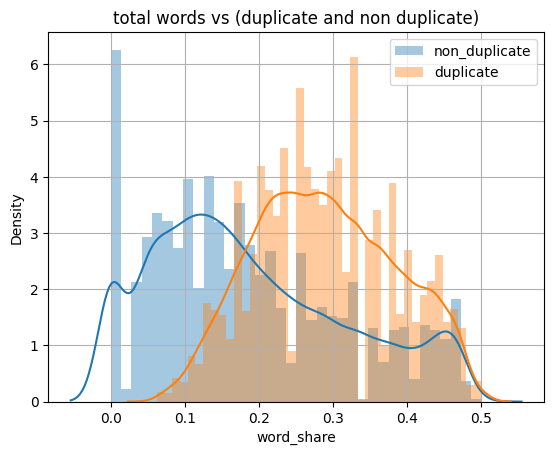

In [ ]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label = 'non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label = 'duplicate')
plt.legend()
plt.grid()
plt.title('total words vs (duplicate and non duplicate)')
plt.show()

**From above graph we notice that number of duplicate word is increasing when word share is increasing**

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_num_word,q2_num_word,common_words,total_length,word_share
0,399083,129246,34231,What's the best way to start eating healthy?,What does a healthy diet consist of?,0,44,36,8,7,0,15,0.000
1,314508,257850,84158,What is the best book to learn c#?,Which is the best book to learn programming in...,1,34,63,8,12,6,20,0.300
2,30940,57075,57076,What is it like traveling by bus from Cedar Ra...,Can anyone know about Indian Kali weapon?,0,62,41,12,7,0,19,0.000
3,341365,469175,469176,How can communism and democracy go hand in hand?,Is communism a political system in the lines o...,0,48,107,9,19,3,23,0.130
4,381481,204944,513221,If a hole is made right through Earth so it re...,If a hole is made on earth to reach the other ...,1,108,90,22,18,10,39,0.256


In [ ]:
q_df = new_df[['question1','question2']]
q_df.shape

(40000, 2)

In [ ]:
new_df_2 = new_df.drop(columns=['id',	'qid1',	'qid2',	'question1',	'question2'])
new_df_2.head()

,is_duplicate,q1_length,q2_length,q1_num_word,q2_num_word,common_words,total_length,word_share
0,0,44,36,8,7,0,15,0.000
1,1,34,63,8,12,6,20,0.300
2,0,62,41,12,7,0,19,0.000
3,0,48,107,9,19,3,23,0.130
4,1,108,90,22,18,10,39,0.256


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#merge questions

questions =  list(q_df['question1']) + list(q_df['question2'])
print("Length of questions    ",len(questions))

cv = CountVectorizer(max_features= 500)
q1,q2 = np.vsplit(cv.fit_transform(questions).toarray(),2)

Length of questions     80000


In [ ]:
temp1_df = pd.DataFrame(q1, index=q_df.index)
temp2_df = pd.DataFrame(q2, index=q_df.index)

temp_df = pd.concat([temp1_df,temp2_df], axis = 1)
temp_df.shape

(40000, 1000)

In [ ]:
final_df = pd.concat([new_df_2, temp_df], axis = 1)
final_df.shape

(40000, 1008)

In [ ]:
final_df.head()

,is_duplicate,q1_length,q2_length,q1_num_word,q2_num_word,common_words,total_length,word_share,0,1,...,490,491,492,493,494,495,496,497,498,499
0,0,44,36,8,7,0,15,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,34,63,8,12,6,20,0.300,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,62,41,12,7,0,19,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,48,107,9,19,3,23,0.130,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,108,90,22,18,10,39,0.256,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,1:].values,
                                                    final_df.iloc[:,0].values,
                                                    test_size= 0.2,
                                                    random_state=42)

In [ ]:
X_test.shape

(8000, 1007)

#Apply RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7805

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy  = accuracy_score(y_test, y_pred)
#accuracy score
print("Accuracy score is ",accuracy)

#Confusion matrix
print("Confusion Matrix : \n")
print(confusion_matrix(y_test, y_pred))

#Classification Rreport
print("Classification Report :\n",classification_report(y_test,y_pred))

Accuracy score is  0.7805
Confusion Matrix : 

[[2853 1123]
 [ 633 3391]]
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.72      0.76      3976
           1       0.75      0.84      0.79      4024

    accuracy                           0.78      8000
   macro avg       0.78      0.78      0.78      8000
weighted avg       0.78      0.78      0.78      8000



#Apply XGBClassifier

In [ ]:
from xgboost import XGBClassifier
xgb  = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_1 = rf.predict(X_test)
accuracy_score(y_test,y_pred_1)

0.7805

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy  = accuracy_score(y_test, y_pred_1)
#accuracy score
print("Accuracy score is ",accuracy)

#Confusion matrix
print("Confusion Matrix : \n")
print(confusion_matrix(y_test, y_pred_1))

#Classification Rreport
print("Classification Report :\n",classification_report(y_test,y_pred_1))

Accuracy score is  0.7805
Confusion Matrix : 

[[2853 1123]
 [ 633 3391]]
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.72      0.76      3976
           1       0.75      0.84      0.79      4024

    accuracy                           0.78      8000
   macro avg       0.78      0.78      0.78      8000
weighted avg       0.78      0.78      0.78      8000



#stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier()
clf2 = XGBClassifier()

estimators=[('RFC', clf1), ('XGB', clf2)]

VC = VotingClassifier(estimators=estimators, voting='soft')

In [ ]:
VC.fit(X_train,y_train)

VotingClassifier(estimators=[('RFC', RandomForestClassifier()),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [ ]:
y_pred_2 = VC.predict(X_test)
accuracy_score(y_test,y_pred_2)

0.783625

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy  = accuracy_score(y_test, y_pred_2)
#accuracy score
print("Accuracy score is ",accuracy)

#Confusion matrix
print("Confusion Matrix : \n")
print(confusion_matrix(y_test, y_pred_2))

#Classification Rreport
print("Classification Report :\n",classification_report(y_test,y_pred_2))

Accuracy score is  0.783625
Confusion Matrix : 

[[2785 1191]
 [ 540 3484]]
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.70      0.76      3976
           1       0.75      0.87      0.80      4024

    accuracy                           0.78      8000
   macro avg       0.79      0.78      0.78      8000
weighted avg       0.79      0.78      0.78      8000



#RESULTS

1. **RandomForestClassifier**

**Accuracy score is**    0.7805

**Confusion Matrix :**

[[2853     1123]

 [ 633     3391]]

**Classification Report :**
               
                  precision    recall   f1-score   support

           0        0.82        0.72      0.76      3976
           1        0.75        0.84      0.79      4024

    accuracy                              0.78      8000
    macro avg       0.78      0.78        0.78      8000
    weighted avg    0.78      0.78        0.78      8000


2. **XGBoost Have same result as RandomForestClassifier.**

3. **VotingClassifier Algorithm**

**Accuracy score is**  0.783625

**Confusion Matrix :**

[[2785    1191]

 [ 540    3484]]

**Classification Report :**

                 precision    recall  f1-score   support

           0       0.84       0.70      0.76      3976
           1       0.75       0.87      0.80      4024

    accuracy                            0.78      8000
    macro avg       0.79      0.78      0.78      8000
    weighted avg    0.79      0.78      0.78      8000